In [ ]:
#Uploads the smart home energy dataset from the local system into Google Colab for analysis.
#importing dataset
from google.colab import files
uploaded=files.upload()

Saving Smart Home Energy Consumption Optimization.csv to Smart Home Energy Consumption Optimization.csv


In [ ]:
#importing libraries
#Importing essential Python libraries for data manipulation, numerical operations, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading csv file
#Loads the Smart Home Energy Consumption dataset into a pandas DataFrame for processing
df=pd.read_csv('Smart Home Energy Consumption Optimization.csv')

In [ ]:
#features in dataset
#Displays the first few rows to understand the structure and contents of the dataset
df.head()

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [ ]:
#data types
#Shows the data types and non-null counts of each column to verify schema correctness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   home_id       int64  
 1   timestamp     object 
 2   device_id     object 
 3   device_type   object 
 4   room          object 
 5   status        object 
 6   power_watt    float64
 7   user_present  int64  
 8   activity      object 
 9   indoor_temp   float64
 10  outdoor_temp  float64
 11  humidity      float64
 12  light_level   float64
 13  day_of_week   int64  
 14  hour_of_day   int64  
 15  price_kWh     int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 213.9+ MB


In [ ]:
#checking null values
#Identifies missing values in each column to assess data completeness
df.isnull().sum()

,0
home_id,0
timestamp,0
device_id,0
device_type,0
room,0
status,0
power_watt,0
user_present,0
activity,0
indoor_temp,0


In [ ]:
#checking duplicate values
#Checks whether duplicate rows exist in the dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
#converting timestamp to datetime
#Converts the timestamp column to datetime format and sorts records chronologically for time-series analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
print(df['timestamp'])



0         2022-01-01 00:00:00
27        2022-01-01 00:00:00
28        2022-01-01 00:00:00
29        2022-01-01 00:00:00
30        2022-01-01 00:00:00
                  ...        
1751969   2022-12-31 23:45:00
1751970   2022-12-31 23:45:00
1751971   2022-12-31 23:45:00
1751960   2022-12-31 23:45:00
1751999   2022-12-31 23:45:00
Name: timestamp, Length: 1752000, dtype: datetime64[ns]


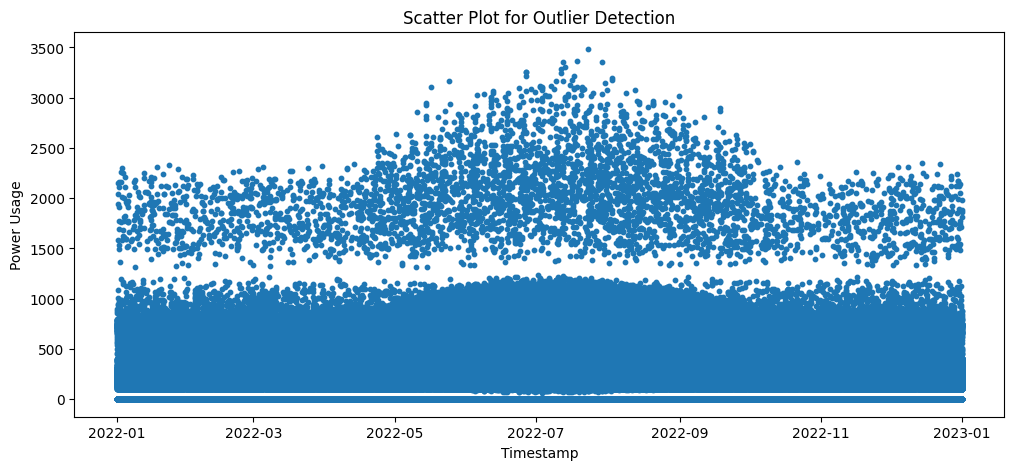

In [ ]:
#scatter plot using matplotlib library
#Visualizes power consumption over time to identify abnormal or extreme energy usage values
plt.figure(figsize=(12,5))
plt.scatter(df['timestamp'], df['power_watt'], s=10)
plt.xlabel("Timestamp")
plt.ylabel("Power Usage")
plt.title("Scatter Plot for Outlier Detection")
plt.show()

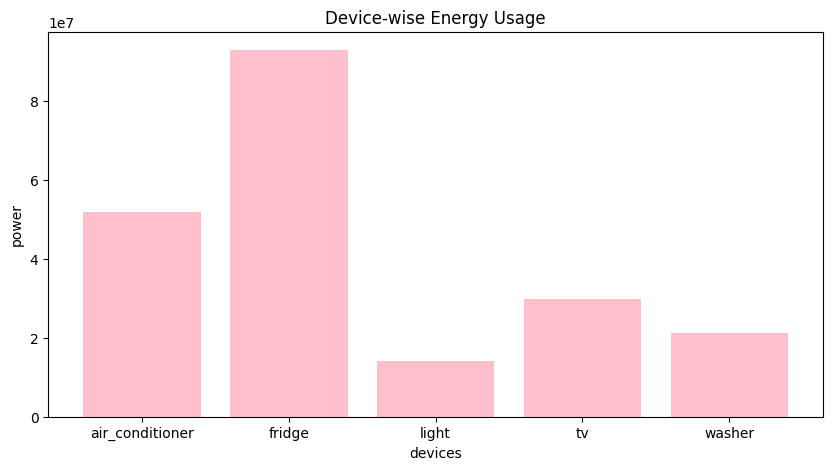

In [ ]:
#bar chart for understanding which device consumes how much energy
#Shows total energy consumption by each device type to identify high energy-consuming appliances
device_usage = df.groupby('device_type')['power_watt'].sum()
plt.figure(figsize=(10,5))
plt.title("Device-wise Energy Usage")
plt.xlabel("devices")
plt.ylabel("power")
plt.bar(device_usage.index,device_usage.values,color='pink')
plt.show()

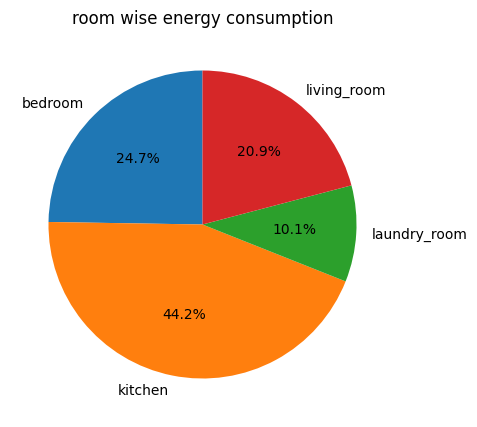

In [ ]:
#room wise energy consumption using pie chart to show proportions
#Displays the proportion of energy consumed by different rooms in the house
room_usage=df.groupby('room')['power_watt'].sum()
plt.figure(figsize=(5,5))
plt.title("room wise energy consumption")
plt.pie(room_usage.values, labels=room_usage.index, autopct='%1.1f%%', startangle=90)
plt.show()


In [ ]:
#resampling the data hourly/daily to understand hourly patterns
#Aggregates energy consumption into hourly and daily intervals to analyze time-based usage patterns
hourly_df = df.resample('h', on='timestamp')['power_watt'].sum().reset_index()
daily_df = df.resample('D', on='timestamp')['power_watt'].sum().reset_index()
print(hourly_df)
print(daily_df)







               timestamp    power_watt
0    2022-01-01 00:00:00  13002.490000
1    2022-01-01 01:00:00  15432.728092
2    2022-01-01 02:00:00  14679.418141
3    2022-01-01 03:00:00  13791.469101
4    2022-01-01 04:00:00  14991.441896
...                  ...           ...
8755 2022-12-31 19:00:00  33764.717995
8756 2022-12-31 20:00:00  38232.737170
8757 2022-12-31 21:00:00  34068.526988
8758 2022-12-31 22:00:00  24516.067682
8759 2022-12-31 23:00:00  18416.979595

[8760 rows x 2 columns]
     timestamp     power_watt
0   2022-01-01  496634.750786
1   2022-01-02  493184.995474
2   2022-01-03  481605.217629
3   2022-01-04  497983.048977
4   2022-01-05  481707.731771
..         ...            ...
360 2022-12-27  499669.230209
361 2022-12-28  488671.495119
362 2022-12-29  473351.162742
363 2022-12-30  501588.772375
364 2022-12-31  478108.717458

[365 rows x 2 columns]


In [ ]:
#normalization / scaling to balance the values using minmax scaler function
#Scales daily energy consumption values between 0 and 1 to prepare data for machine learning models
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
daily_df['scaled_power']=scaler.fit_transform(daily_df[['power_watt']])
print(daily_df['scaled_power'])

0      0.075736
1      0.068149
2      0.042679
3      0.078702
4      0.042905
         ...   
360    0.082410
361    0.058221
362    0.024525
363    0.086632
364    0.034989
Name: scaled_power, Length: 365, dtype: float64


In [ ]:
#train test split to test and validate an ml model
#Splits the dataset into training and testing sets to evaluate machine learning model performance
X=df.drop('power_watt',axis=1)
y=df['power_watt']




In [ ]:
#Extracting time based features to analyse weekly,monthly,hourly trends
#Derives hour, day, weekday, week number, and month from timestamps to capture temporal patterns
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek   # 0 = Monday
df['week'] = df['timestamp'].dt.isocalendar().week
df['month'] = df['timestamp'].dt.month


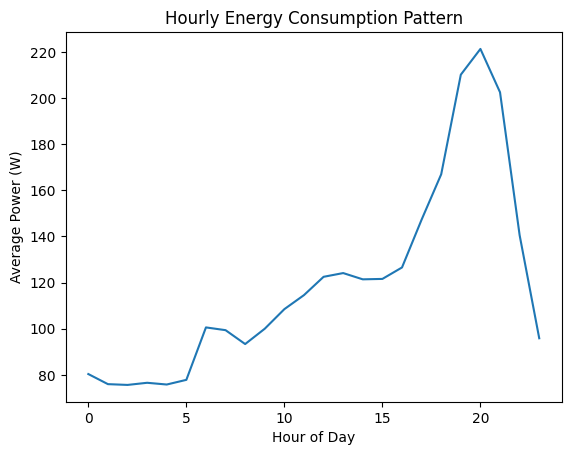

In [ ]:
#aggregating device level consumption to understand how much each device is consuming the energy
#Hour-wise Energy Usage
#Analyzes average power consumption for each hour of the day to identify peak usage times
hourly_usage = df.groupby('hour')['power_watt'].mean()
plt.figure()
hourly_usage.plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (W)')
plt.title('Hourly Energy Consumption Pattern')
plt.show()



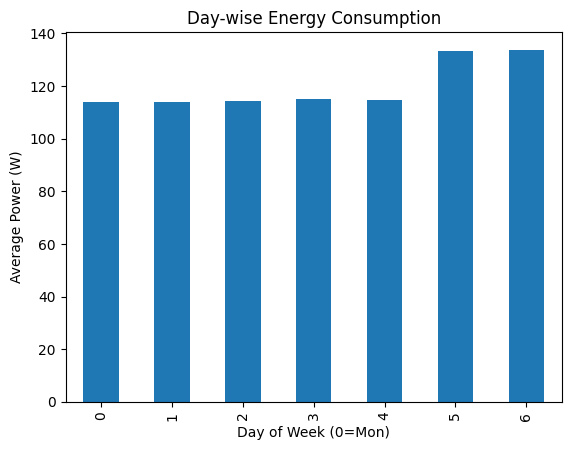

In [ ]:
#Day-of-Week Consumption
#Insight: Weekday vs weekend behavior
#Compares average energy usage across weekdays to study behavioral differences
df_usage = df.groupby('day_of_week')['power_watt'].mean()
plt.figure()
df_usage.plot(kind='bar')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Power (W)')
plt.title('Day-wise Energy Consumption')
plt.show()


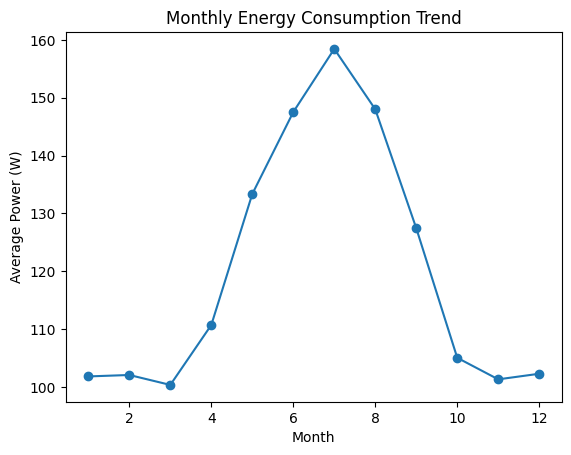

In [ ]:
#Monthly Trend
#Insight: Seasonal patterns
#Shows how energy consumption varies across months to observe seasonal patterns
monthly_usage = df.groupby('month')['power_watt'].mean()
plt.figure()
monthly_usage.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Power (W)')
plt.title('Monthly Energy Consumption Trend')
plt.show()


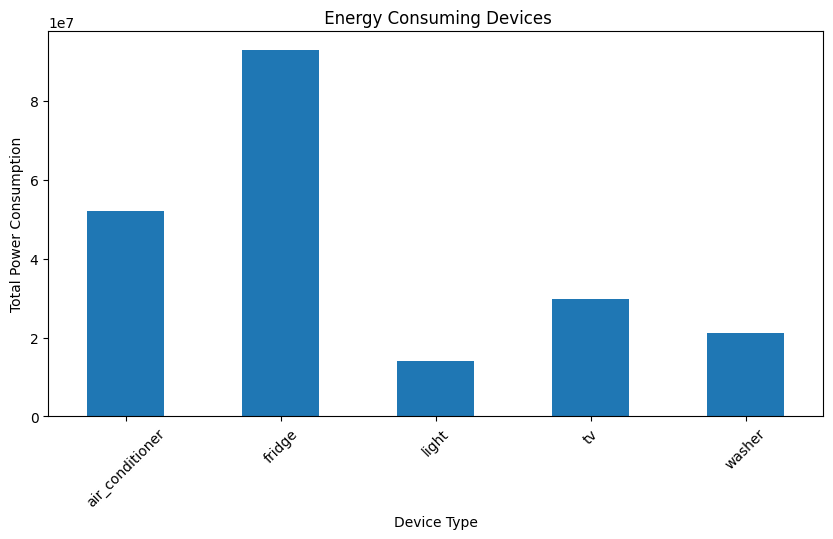

In [ ]:
#Device-wise Total Consumption
#Highlights total power consumed by each device type for usage comparison
device_energy = df.groupby('device_type')['power_watt'].sum()
plt.figure(figsize=(10,5))
device_energy.plot(kind='bar')
plt.xlabel('Device Type')
plt.ylabel('Total Power Consumption')
plt.title(' Energy Consuming Devices')
plt.xticks(rotation=45)
plt.show()



In [ ]:
#creating  lag features
#Generates past energy consumption values to help the model learn time-series dependencies
df['lag_1'] = df['power_watt'].shift(1)
df['lag_2'] = df['power_watt'].shift(2)
df['lag_24'] = df['power_watt'].shift(24)   # if hourly data



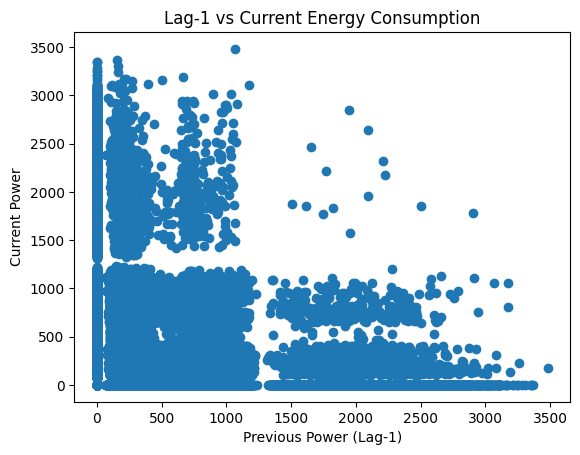

In [ ]:
#lag_1 visualization
#Shows the relationship between current energy usage and the immediately previous value
plt.figure()
plt.scatter(df['lag_1'], df['power_watt'])
plt.xlabel('Previous Power (Lag-1)')
plt.ylabel('Current Power')
plt.title('Lag-1 vs Current Energy Consumption')
plt.show()


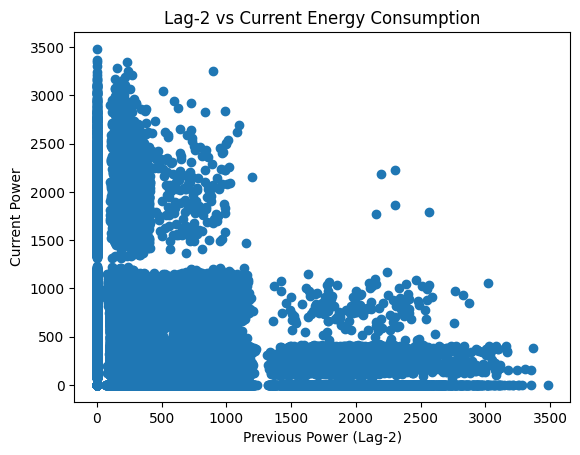

In [ ]:
#lag_2 visualization
#Visualizes how energy consumption depends on values from two previous time steps
plt.figure()
plt.scatter(df['lag_2'], df['power_watt'])
plt.xlabel('Previous Power (Lag-2)')
plt.ylabel('Current Power')
plt.title('Lag-2 vs Current Energy Consumption')
plt.show()

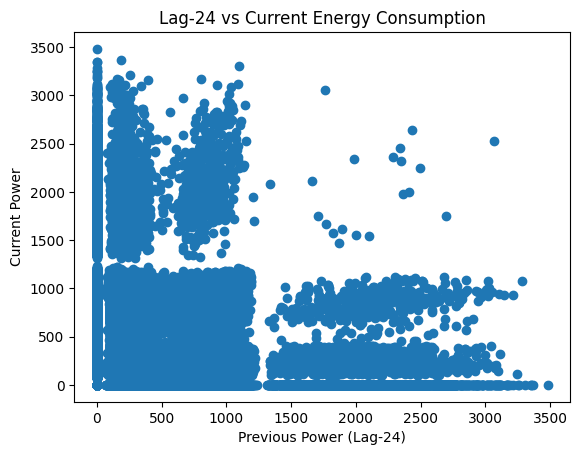

In [ ]:
#lag_24 visualization for hourly data
#Analyzes daily dependency by comparing current energy usage with the previous day’s consumption
plt.figure()
plt.scatter(df['lag_24'], df['power_watt'])
plt.xlabel('Previous Power (Lag-24)')
plt.ylabel('Current Power')
plt.title('Lag-24 vs Current Energy Consumption')
plt.show()

In [ ]:
#Creating Moving Averages
#Goal: Capture smooth trends and reduce noise
#Calculates rolling averages to smooth short-term fluctuations and capture long-term trends
df['rolling_mean_3'] = df['power_watt'].rolling(3).mean().shift(1)
df['rolling_mean_7'] = df['power_watt'].rolling(7).mean().shift(1)
df = df.dropna()


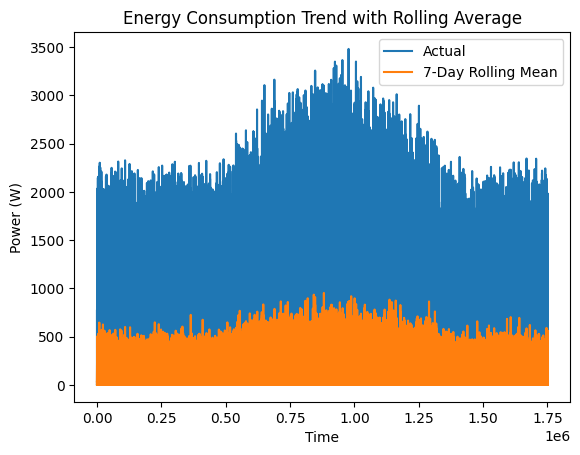

In [ ]:
#Rolling Average Visualization
#Compares actual energy consumption with smoothed trends to visualize noise reduction
plt.figure()
plt.plot(df.index, df['power_watt'], label='Actual')
plt.plot(df.index, df['rolling_mean_7'], label='7-Day Rolling Mean')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (W)')
plt.title('Energy Consumption Trend with Rolling Average')
plt.show()


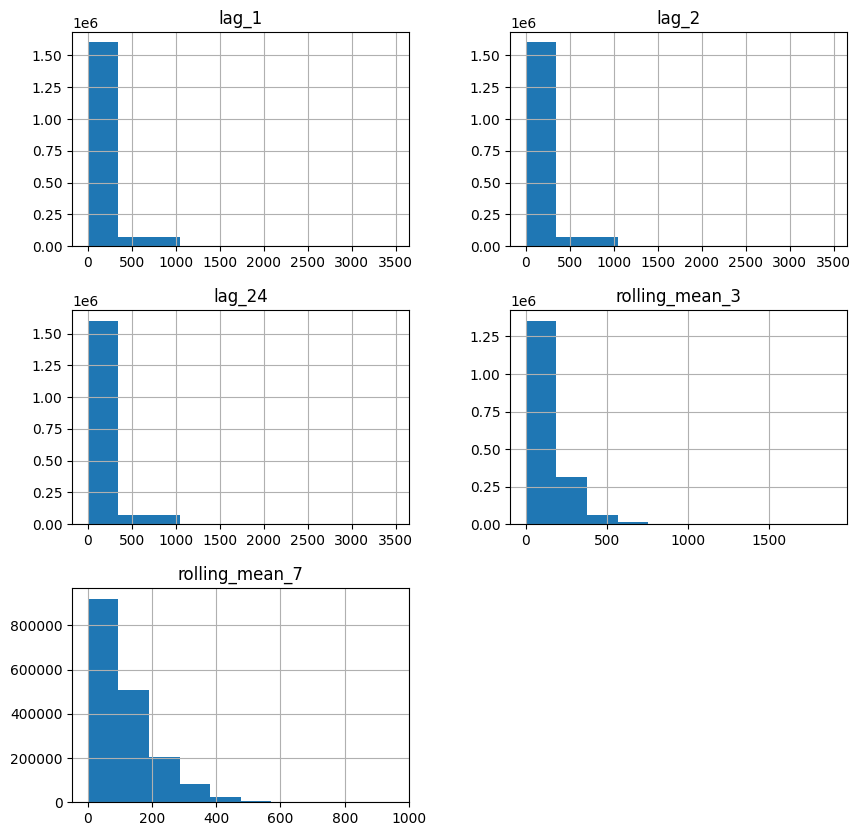

In [ ]:
#Histogram of Engineered Features
#Visualizes the distribution of lag and rolling features to understand data spread and behavior
df[['lag_1', 'lag_2','lag_24','rolling_mean_3', 'rolling_mean_7']].hist(figsize=(10,10))
plt.show()


In [ ]:
#Final Feature Set for ML Input
#Selects engineered features required as input (X) and target (y) for machine learning models
features = [
    'hour', 'day_of_week', 'month',
    'lag_1', 'lag_2', 'lag_24',
    'rolling_mean_3', 'rolling_mean_7'

]

X = df[features]
from sklearn.preprocessing import MinMaxScaler

target_scaler = MinMaxScaler()
df['power_scaled'] = target_scaler.fit_transform(df[['power_watt']])

y = df['power_scaled']




In [ ]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['power_scaled']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.0420755985027275
RMSE: 0.0531102633588949
R2 Score: -0.03903132456088665


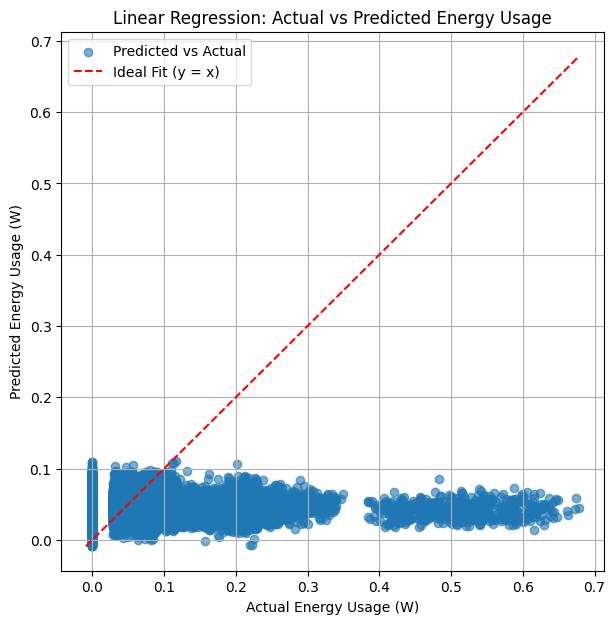

In [ ]:
plt.figure(figsize=(7,7))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')

# Perfect prediction line (y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Fit (y = x)')

plt.xlabel('Actual Energy Usage (W)')
plt.ylabel('Predicted Energy Usage (W)')
plt.title('Linear Regression: Actual vs Predicted Energy Usage')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Module 5
#LSTM Model Development
#In this step, required Python libraries such as NumPy, Pandas, TensorFlow/Keras, and evaluation metrics are imported.
#These libraries are used for data handling, building the LSTM neural network, training the model, and evaluating its performance.
#NumPy → numerical operations
#TensorFlow/Keras → deep learning model
#Scikit-learn → metrics and scaling

In [ ]:
#This cell extracts the energy consumption (power_watt) column from the dataset and converts it into a NumPy array.
#This prepares the target variable in a format suitable for scaling and time-series modeling using LSTM.
import numpy as np
data = df[['power_scaled']].values




In [ ]:
#This cell applies Min-Max normalization to scale the energy consumption values between 0 and 1.
#Normalization is important for LSTM models as it improves training stability and convergence.
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data  = data[train_size:]



In [ ]:
#This function converts the time series data into sequences using a sliding window approach,
#which is required to provide 3D input to the LSTM model.
#This cell defines a function to convert the scaled energy data into sequential input-output pairs using a sliding window approach.
#The model uses the previous 24 time steps to predict the next energy value, which converts the data into a 3D format required by LSTM.

TIME_STEPS = 24

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, TIME_STEPS)
X_test, y_test   = create_sequences(test_data, TIME_STEPS)




In [ ]:
#This cell splits the dataset into training and testing sets while maintaining the temporal order.
#Shuffling is avoided because LSTM models require sequential data to learn time-based patterns correctly.

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
#This cell defines and compiles the LSTM neural network architecture for energy consumption prediction.
 #The model consists of two stacked LSTM layers to capture both short-term and long-term temporal dependencies in the time-series data.
 # A Dropout layer is added to reduce overfitting by randomly disabling neurons during training. The final Dense layer outputs a single predicted energy value.
#The model uses the Adam optimizer and Mean Squared Error (MSE) loss function, which is suitable for regression-based forecasting problems.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, 1)),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#This cell trains the LSTM model using the training dataset.
#A portion of the training data is used for validation to monitor model performance and reduce overfitting during training.

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)




Epoch 1/3
39420/39420 ━━━━━━━━━━━━━━━━━━━━ 416s 10ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 2/3
39420/39420 ━━━━━━━━━━━━━━━━━━━━ 415s 11ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 3/3
39420/39420 ━━━━━━━━━━━━━━━━━━━━ 443s 11ms/step - loss: 0.0041 - val_loss: 0.0035


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

lstm_mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("LSTM (Single Split)")
print("MAE:", lstm_mae)
print("MSE:", mse)
print("R2:", r2)


10950/10950 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step
LSTM (Single Split)
MAE: 0.0361225954010597
MSE: 0.002715575500684759
R2: -0.00030770211210651155


In [ ]:
import pandas as pd
import numpy as np

results = pd.DataFrame({
    "Model": ["Linear Regression", "LSTM"],
    "MAE": [mae, lstm_mae],
    "RMSE": [rmse, np.sqrt(mse)],
    "R2 Score": [r2, r2]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.042076,0.053110,-0.000308
1,LSTM,0.036123,0.052111,-0.000308


In [ ]:
best_model = results.sort_values(
    by=["R2 Score", "RMSE"],
    ascending=[False, True]
).iloc[0]

print("✅ Best Model:")
print(best_model)



✅ Best Model:
Model           LSTM
MAE         0.036123
RMSE        0.052111
R2 Score   -0.000308
Name: 1, dtype: object


In [ ]:
model.save("lstm_energy_model.h5")


In [ ]:
import joblib

model_metadata = {
    "model_type": "LSTM",
    "time_steps": TIME_STEPS,
    "epochs": 3,
    "batch_size": 32,
    "optimizer": "adam",
    "loss_function": "mse",
    "metrics": {
        "MAE": float(lstm_mae),
        "RMSE": float(np.sqrt(mse)),
        "R2": float(r2)
    },
    "scalers": {
        "target_scaler": target_scaler
    }
}

joblib.dump(model_metadata, "lstm_metadata.joblib")

print("✅ Model metadata saved")


✅ Model metadata saved


In [ ]:
from google.colab import files

files.download("lstm_energy_model.h5")
files.download("lstm_metadata.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>